# Computational Techniques in Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.interpolate
import scipy.optimize
%matplotlib inline

Consider a monopolist's problem to maximize its profits
$$
\max_p (p-c)D(p)
$$
Assume the monopolist only knows the demand function at a finite number of points and needs to interpolation between these points to be able to solve the maximization problem.

The monopolist knows
$$
d_i = D(p_i)
$$
for points $i=1,...,N$.

## Interpolation
First, we want to look at how to interpolation the function $D(p)$ based on the points $p_i$ and $d_i$ for $i=1,...,N$.

In [2]:
# assume points p_i, d_i for i=1,...,N
p = np.linspace(1,5,num=9)
d = p**(-2.0)

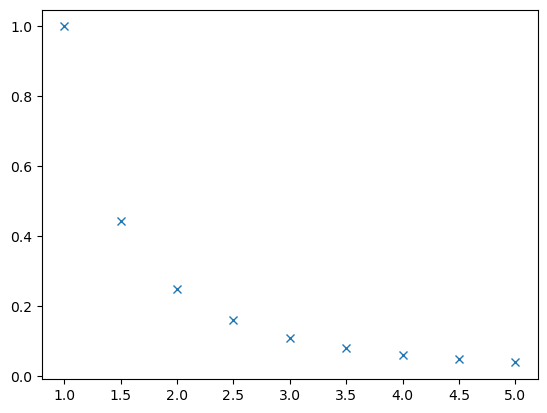

In [3]:
plt.plot(p, d, 'x');

In [13]:
D = scipy.interpolate.interp1d(
    p, d, fill_value='extrapolate', kind='cubic')

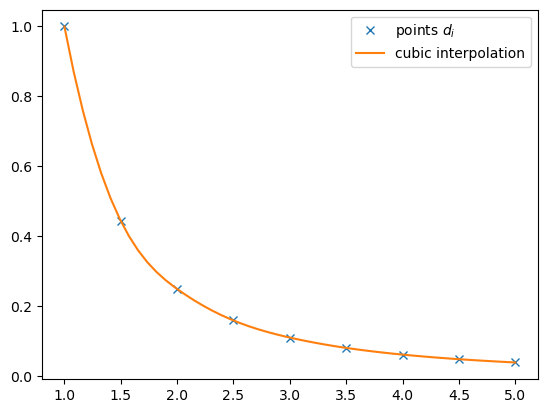

In [14]:
p_grid = np.linspace(np.min(p), np.max(p))
plt.plot(p, d, 'x', label='points $d_i$')
plt.plot(p_grid, D(p_grid), label='cubic interpolation')
plt.legend();

## Optimization
With the interpolated function at hand, we can compute the profit maximizing function by using a maximization routine.

`scipy` only has a minimization function, but no maximization function. There is a simple solution: minimize the negative profit function! That is, solving
$$
\max_p (p-c)D(p)
$$
is equivalent to solving
$$
\min_p -(p-c)D(p).
$$

Assume costs are $c=1.3$.

In [21]:
c = 1.3
solution_profit_max = scipy.optimize.minimize_scalar(lambda p: -(p-c)*D(p), 
                        method='bounded', bounds=(np.min(p), np.max(p)))

In [22]:
solution_profit_max

 message: Solution found.
 success: True
  status: 0
     fun: -0.19201639045667449
       x: 2.5257451211303854
     nit: 11
    nfev: 11

In [23]:
print(f'the profit maximizing price is {solution_profit_max.x}')
print(f'the maximal profit is {-solution_profit_max.fun}')

the profit maximizing price is 2.5257451211303854
the maximal profit is 0.19201639045667449


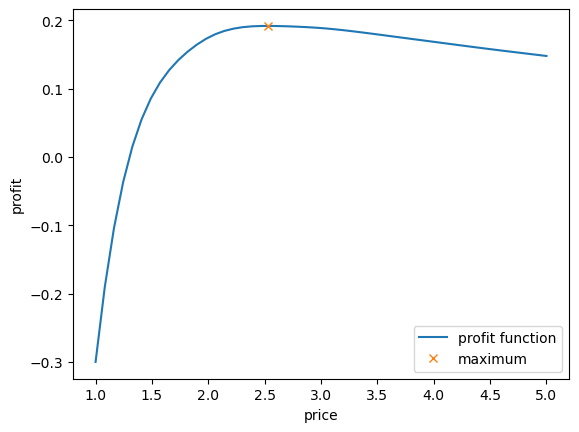

In [24]:
plt.plot(p_grid, (p_grid-c)*D(p_grid), label='profit function')
plt.plot(solution_profit_max.x, -solution_profit_max.fun, 'x', label='maximum')
plt.xlabel('price')
plt.ylabel('profit')
plt.legend();

## Solving First-Order Condition
An alternative approach to maximization is to solve the first order condition. The first-order condition of the above profit maximization problem is
$$
p + \frac{D(p)}{D'(p)} - c = 0
$$
Assume that the monopolist knows not only the demand at some points 
$$
d_i = D(p_i)
$$
but also its derivative
$$
e_i = D'(p_i)
$$
for points $i=1,...,N$.

In [25]:
# assume points p_i, e_i for i=1,...,N
e = -2*p**(-3.0)

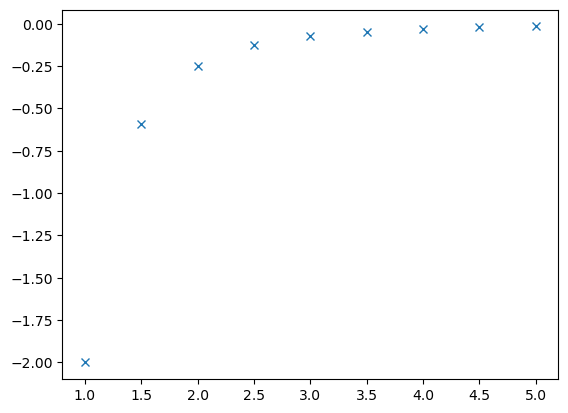

In [26]:
plt.plot(p, e, 'x');

In [33]:
D_prime = scipy.interpolate.interp1d(
    p, e, fill_value='extrapolate', kind='cubic')

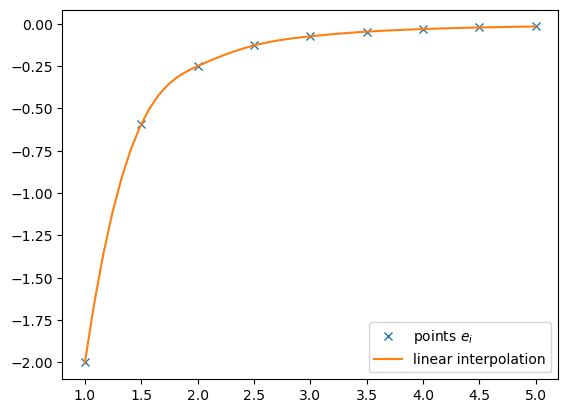

In [34]:
p_grid = np.linspace(np.min(p), np.max(p))
plt.plot(p, e, 'x', label='points $e_i$')
plt.plot(p_grid, D_prime(p_grid), label='linear interpolation')
plt.legend();

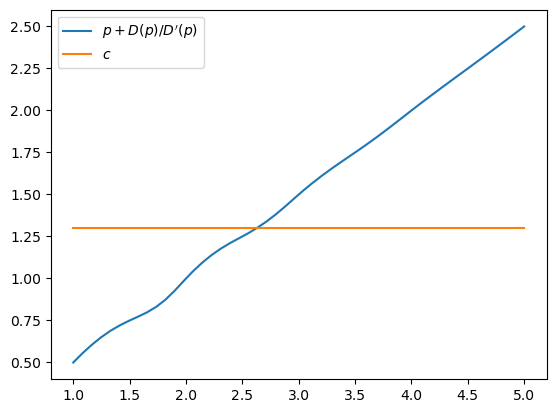

In [35]:
# plot first-order condition
plt.plot(p_grid, p_grid + D(p_grid)/D_prime(p_grid), label="$p+D(p)/D'(p)$")
plt.plot([p_grid[0],p_grid[-1]], [c, c], label='$c$')
plt.legend();

In [36]:
solution_foc = scipy.optimize.fsolve(lambda p: p+D(p)/D_prime(p)-c, x0=p_grid.mean())
p_star = solution_foc[0]

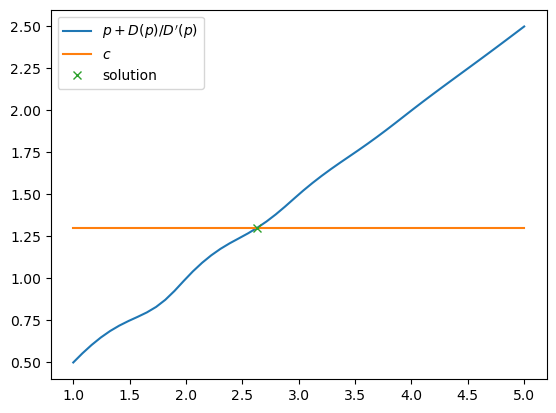

In [37]:
# plot first-order condition
plt.plot(p_grid, p_grid + D(p_grid)/D_prime(p_grid), label="$p+D(p)/D'(p)$")
plt.plot([p_grid[0],p_grid[-1]], [c, c], label='$c$')
plt.plot(p_star, p_star + D(p_star)/D_prime(p_star), 'x', label='solution')
plt.legend();

In [38]:
print(f'optimal price: {p_star}')

optimal price: 2.628092405171113


## Exercise
Consider a risk-averse consumer with utility function $U(x)$ who has an initial wealth $W$. With probability 50% he has an accident and loss $L$. He can buy an insurance for a premium $\pi$, in case there is an accident, the insurance pays him $2\pi$. Formally, his profit maximization problem is
$$
\max_\pi \frac{1}{2} U(W-L+\pi) + \frac{1}{2} U(W-\pi)
$$
Assume $W=100$, $L=20$. We know the utility function for $N$ points:
$$
v_i = U(x_i)
$$
for $i=1,...,N$.

In [118]:
x = np.linspace(1, 100, num=50)
v = np.log(x)

Use points $x_i$ and $v_i$ for $i=1,...,N$ to interpolate function $U$. Plot the interpolated function.

Use the interpolated function to solve the consumer's utility maximization problem.

Assume that we also know the derivative of the utility function at $N$ points:
$$
w_i = U'(x_i)
$$
for $i=1,...,N$.

In [119]:
w = 1/x

Use points $w_i$ for $i=1,...,N$ to interpolate the function $U'$. Solve the consumer's utility maximization problem by solving the first-order condition for the optimal $\pi$.